# 1- EDA:

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

<ipython-input-55-6892832884e5>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
dataset = pd.read_json('/content/drive/MyDrive/topicDetection/News_Category_Dataset_v3.json', lines=True)
dataset.drop(['authors', 'link', 'date'], axis = 1, inplace = True)
dataset.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten."""
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."""
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           209527 non-null  object
 1   category           209527 non-null  object
 2   short_description  209527 non-null  object
dtypes: object(3)
memory usage: 4.8+ MB


In [ ]:
dataset.describe()

,headline,category,short_description
count,209527,209527,209527
unique,207996,42,187022
top,Sunday Roundup,POLITICS,
freq,90,35602,19712


In [ ]:
print("We have a total of {} categories".format(dataset['category'].nunique()))
dataset['category'].value_counts()

We have a total of 42 categories


POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL            9900 
STYLE & BEAUTY    9814 
PARENTING         8791 
HEALTHY LIVING    6694 
QUEER VOICES      6347 
FOOD & DRINK      6340 
BUSINESS          5992 
COMEDY            5400 
SPORTS            5077 
BLACK VOICES      4583 
HOME & LIVING     4320 
PARENTS           3955 
THE WORLDPOST     3664 
WEDDINGS          3653 
WOMEN             3572 
CRIME             3562 
IMPACT            3484 
DIVORCE           3426 
WORLD NEWS        3299 
MEDIA             2944 
WEIRD NEWS        2777 
GREEN             2622 
WORLDPOST         2579 
RELIGION          2577 
STYLE             2254 
SCIENCE           2206 
TECH              2104 
TASTE             2096 
MONEY             1756 
ARTS              1509 
ENVIRONMENT       1444 
FIFTY             1401 
GOOD NEWS         1398 
U.S. NEWS         1377 
ARTS & CULTURE    1339 
COLLEGE           1144 
LATINO VOICES     1130 
CULTURE & ARTS    1074 
EDUCATION       

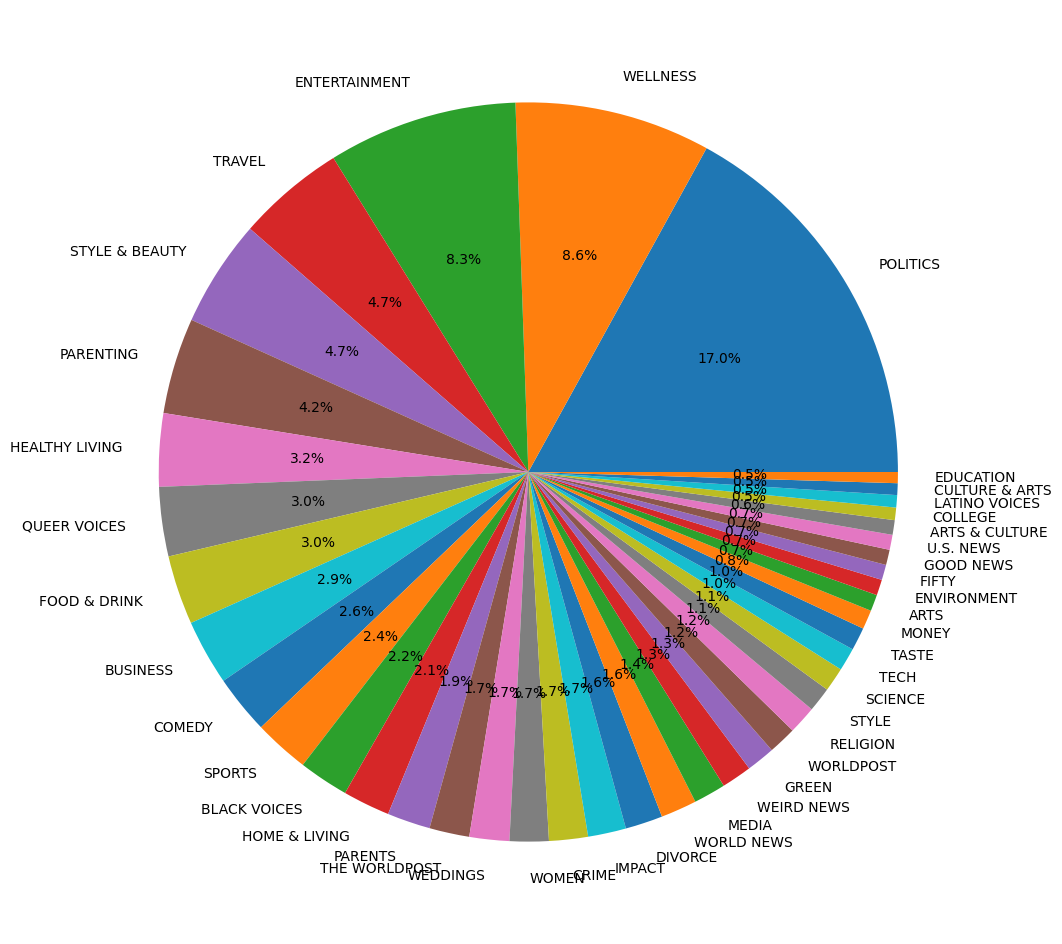

In [ ]:
fig = plt.figure(figsize=(12,12))
plt.pie(dataset['category'].value_counts().values,
        labels=dataset['category'].value_counts().index,
        autopct='%1.1f%%');

In [ ]:
categories = dataset['category'].value_counts().index

def groupper(grouplist,name):
    for ele in categories:
        if ele in grouplist:
            dataset.loc[dataset['category'] == ele, 'category'] = name

In [ ]:
groupper( grouplist= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE AND WELLNESS')

groupper( grouplist= [ 'PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING AND EDUCATION')

groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name =  'GENERAL')

groupper( grouplist= ['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name =  'MISC')

In [ ]:
print("We have a total of {} categories now".format(dataset['category'].nunique()))
dataset['category'].value_counts()

We have a total of 13 categories now


LIFESTYLE AND WELLNESS          41027
POLITICS                        35602
SPORTS AND ENTERTAINMENT        32125
TRAVEL-TOURISM & ART-CULTURE    20749
EMPOWERED VOICES                15632
PARENTING AND EDUCATION         14904
MISC                            12600
GENERAL                         9845 
WORLDNEWS                       9542 
BUSINESS-MONEY                  7748 
SCIENCE AND TECH                4310 
ENVIRONMENT                     4066 
U.S. NEWS                       1377 
Name: category, dtype: int64

In [ ]:
dataset['category'].unique()

array(['U.S. NEWS', 'SPORTS AND ENTERTAINMENT', 'PARENTING AND EDUCATION',
       'WORLDNEWS', 'TRAVEL-TOURISM & ART-CULTURE', 'SCIENCE AND TECH',
       'POLITICS', 'ENVIRONMENT', 'GENERAL', 'LIFESTYLE AND WELLNESS',
       'BUSINESS-MONEY', 'MISC', 'EMPOWERED VOICES'], dtype=object)

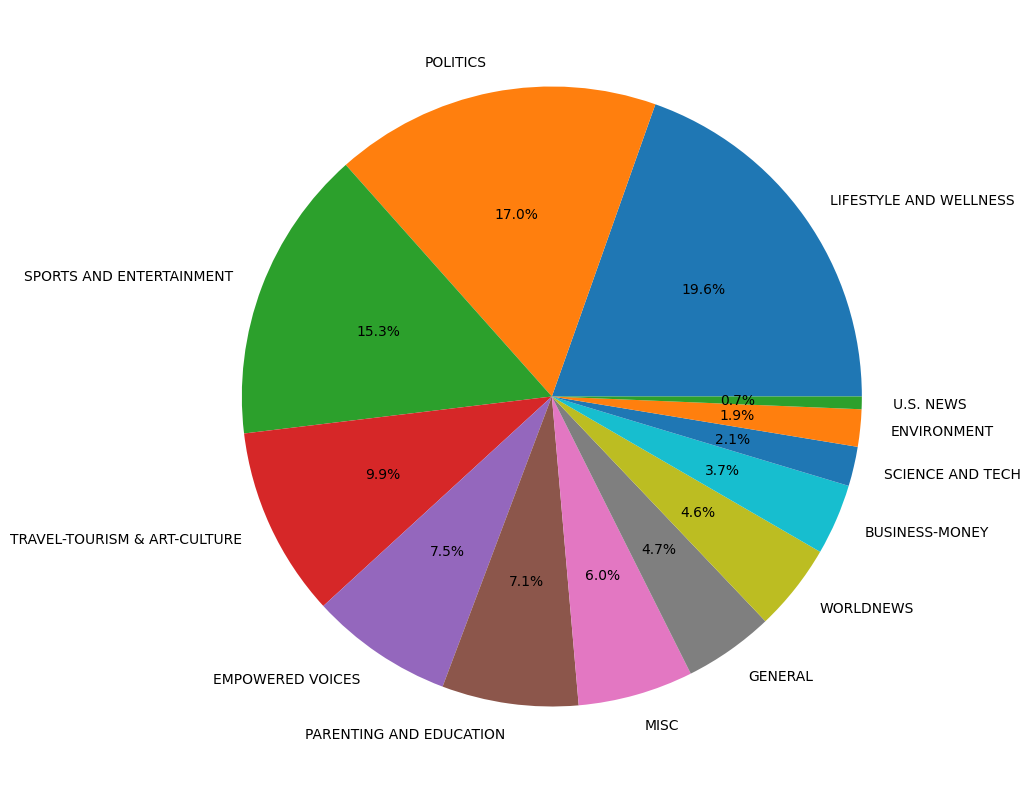

In [ ]:
fig = plt.figure(figsize=(10,20))
plt.pie(dataset['category'].value_counts().values,
        labels=dataset['category'].value_counts().index,
        autopct='%1.1f%%');

In [ ]:
df = dataset.copy()

In [ ]:
df.duplicated().sum()  #total duplicates

474

In [ ]:
df.drop_duplicates(keep='last', inplace=True)

In [ ]:
df.duplicated(subset=['short_description','headline']).sum() #duplicates under 'short_description' and 'headline'

15

In [ ]:
df.drop_duplicates(subset=['short_description','headline'],keep='last',inplace=True)

In [ ]:
print(len(df[df['headline'] == ""]))

2


In [ ]:
df.loc[df['headline'] == "", 'headline'] = np.nan
df.dropna(subset=['headline'], inplace=True)
print(len(df[df['headline'] == ""]))

0


In [ ]:
print(len(df[df['short_description'] == ""]))

19610


In [ ]:
df.loc[df['short_description'] == "", 'short_description'] = np.nan
df.dropna(subset=['short_description'], inplace=True)
print(len(df[df['short_description'] == ""]))

0


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,headline,category,short_description
0,Trump's Ban On Trans People In The Armed Forces Is A Call To Arms,EMPOWERED VOICES,President Donald Trump set the American LGBT community ablaze Wednesday with a series of tweets that communicated his intent
1,Women's Group Shines Light On Trump Sexual Assault Allegations Before State Of The Union,POLITICS,Twenty-one women have accused the president of sexual misconduct.
2,Janet Napolitano Discusses How Schools Should Handle Campus Rape,PARENTING AND EDUCATION,University of California system President Janet Napolitano credited sexual assault survivors and their advocacy groups with raising the issue of rape on campus to a point where school leaders can no longer avoid the issue.
3,A Photoshopped Picture Of Donald Trump Is Freaking Everyone Out,SPORTS AND ENTERTAINMENT,🤔🤔🤔
4,"Barbara Corcoran, Real Estate Mogul And 'Shark Tank' Judge, On The Challenge Of Selling Her Home (PHOTOS, VIDEO)",LIFESTYLE AND WELLNESS,Take a look through our slideshow to see photos of Corcoran's charming estate and head over to Gillian Stewart Real Estate


In [ ]:
df['desc'] = df['headline'].astype(str)+"-"+df['short_description']
df.drop(columns =['headline','short_description'],axis = 1, inplace=True)
df.astype(str)
df.head()

,category,desc
0,EMPOWERED VOICES,Trump's Ban On Trans People In The Armed Forces Is A Call To Arms-President Donald Trump set the American LGBT community ablaze Wednesday with a series of tweets that communicated his intent
1,POLITICS,Women's Group Shines Light On Trump Sexual Assault Allegations Before State Of The Union-Twenty-one women have accused the president of sexual misconduct.
2,PARENTING AND EDUCATION,Janet Napolitano Discusses How Schools Should Handle Campus Rape-University of California system President Janet Napolitano credited sexual assault survivors and their advocacy groups with raising the issue of rape on campus to a point where school leaders can no longer avoid the issue.
3,SPORTS AND ENTERTAINMENT,A Photoshopped Picture Of Donald Trump Is Freaking Everyone Out-🤔🤔🤔
4,LIFESTYLE AND WELLNESS,"Barbara Corcoran, Real Estate Mogul And 'Shark Tank' Judge, On The Challenge Of Selling Her Home (PHOTOS, VIDEO)-Take a look through our slideshow to see photos of Corcoran's charming estate and head over to Gillian Stewart Real Estate"


# 2- Model training:

In [ ]:
X,Y = df['desc'],df['category']

#80% to train , 10% for validation , 10% for testing
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
X_val, X_test , y_val, y_test= train_test_split(X_val,y_val, test_size=0.5, random_state=42)

In [ ]:
vocab_size =20000
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
vocab_size =20000
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_train = np.asarray(y_train)
y_train = pd.get_dummies(y_train)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_val = np.asarray(y_val)
y_val = pd.get_dummies(y_val)

train_set = np.array(X_train)
val_set = np.array(X_val)

train_label = np.array(y_train)
val_label = np.array(y_val)


y_test = pd.get_dummies(y_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test,axis=1)   #this would be our ground truth label while testing

print(train_set.shape)
print(train_label.shape)


print(val_set.shape)
print(val_label.shape)

(151540, 150)
(151540, 13)
(18943, 150)
(18943, 13)


In [ ]:
# prompt: save tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip -P /content/drive/MyDrive/topicDetection


--2023-12-31 20:19:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-31 20:19:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-31 20:19:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/content/drive/MyDr

In [ ]:
!unzip /content/drive/MyDrive/topicDetection/glove.6B.zip -d /content/drive/MyDrive/topicDetection

Archive:  /content/drive/MyDrive/topicDetection/glove.6B.zip
  inflating: /content/drive/MyDrive/topicDetection/glove.6B.50d.txt  
  inflating: /content/drive/MyDrive/topicDetection/glove.6B.100d.txt  
  inflating: /content/drive/MyDrive/topicDetection/glove.6B.200d.txt  
  inflating: /content/drive/MyDrive/topicDetection/glove.6B.300d.txt  


In [ ]:
path_to_glove_file =  '/content/drive/MyDrive/topicDetection/glove.6B.100d.txt'

In [ ]:
#Initialising the embedding matrix with glove vec embeddings

num_tokens = len(tokenizer.word_index.items()) + 2
embedding_dim = 100
hits = 0
misses = 0


embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 66483 words (39750 misses)


In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3, min_delta=0.0001)


tf.keras.backend.clear_session()
embed_size = 100
model = keras.models.Sequential([

        Embedding(num_tokens,
        embedding_dim,
        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
        mask_zero=True,input_shape=[None],trainable=False),
        keras.layers.Bidirectional(keras.layers.LSTM(256, dropout = 0.4)),
        keras.layers.Dense(13, activation="softmax")

        ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         10623500  
                                                                 
 bidirectional (Bidirection  (None, 512)               731136    
 al)                                                             
                                                                 
 dense (Dense)               (None, 13)                6669      
                                                                 
Total params: 11361305 (43.34 MB)
Trainable params: 737805 (2.81 MB)
Non-trainable params: 10623500 (40.53 MB)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit( train_set,train_label,
                     batch_size = 32,
                     steps_per_epoch=len(X_train) // 32,
                     validation_data = (val_set , val_label),
                     validation_steps = len(val_set)//32, epochs=20,
                     callbacks=  early_stop )

Epoch 1/20
4735/4735 [==============================] - 100s 18ms/step - loss: 1.1807 - accuracy: 0.6248 - val_loss: 0.9756 - val_accuracy: 0.6881
Epoch 2/20
4735/4735 [==============================] - 81s 17ms/step - loss: 0.9926 - accuracy: 0.6825 - val_loss: 0.9244 - val_accuracy: 0.7067
Epoch 3/20
4735/4735 [==============================] - 84s 18ms/step - loss: 0.9230 - accuracy: 0.7017 - val_loss: 0.8948 - val_accuracy: 0.7100
Epoch 4/20
4735/4735 [==============================] - 79s 17ms/step - loss: 0.8774 - accuracy: 0.7150 - val_loss: 0.8717 - val_accuracy: 0.7202
Epoch 5/20
4735/4735 [==============================] - 80s 17ms/step - loss: 0.8406 - accuracy: 0.7261 - val_loss: 0.8752 - val_accuracy: 0.7195
Epoch 6/20
4735/4735 [==============================] - 79s 17ms/step - loss: 0.8120 - accuracy: 0.7347 - val_loss: 0.8800 - val_accuracy: 0.7207
Epoch 7/20
4735/4735 [==============================] - 78s 17ms/step - loss: 0.7882 - accuracy: 0.7403 - val_loss: 0.8782 

In [ ]:
model.save('/content/drive/MyDrive/topicDetection/model_lstm.h2')

# 3- Model Evaluation:

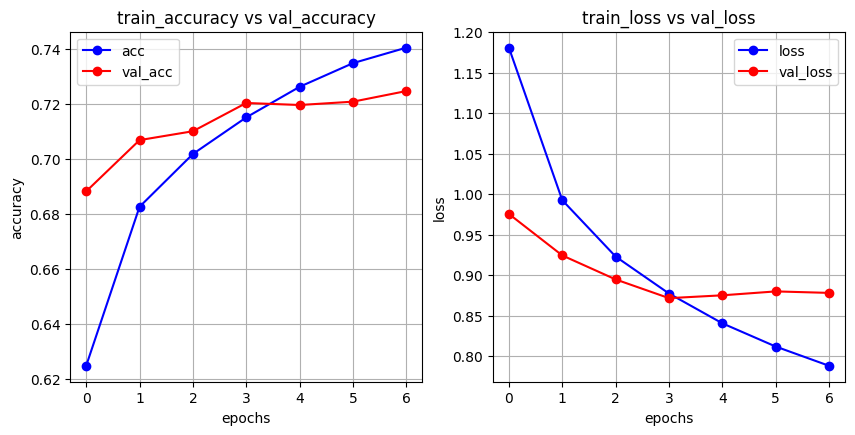

In [ ]:
fig = plt.figure(figsize=(10,10))

# Plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo-', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro-', label = "val_acc")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'],'bo-', label = "loss")
plt.plot(history.history['val_loss'], 'ro-', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()


In [ ]:
classes = dataset['category'].value_counts().index

def prediction(inference_data):
    X = tokenizer.texts_to_sequences(inference_data)
    X = pad_sequences(X,maxlen= max_length,padding=padding_type, truncating=trunc_type)
    pred = model.predict(X)
    pred_value = tf.argmax(pred,axis =1).numpy()
    pred_class = classes[pred_value]
    return pred_class,pred_value

In [ ]:
y_pred_class, y_pred = prediction(X_test)

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       678
           1       0.62      0.51      0.56      1377
           2       0.47      0.54      0.50       305
           3       0.45      0.37      0.41       799
           4       0.77      0.83      0.80      3946
           5       0.74      0.68      0.70      1106
           6       0.69      0.72      0.71      1452
           7       0.77      0.80      0.78      3237
           8       0.57      0.51      0.54       348
           9       0.72      0.74      0.73      2739
          10       0.79      0.79      0.79      2036
          11       0.41      0.13      0.20       146
          12       0.63      0.74      0.68       774

    accuracy                           0.72     18943
   macro avg       0.64      0.60      0.61     18943
weighted avg       0.71      0.72      0.71     18943



Text(0.5, 1.0, 'Confusion matrix of model')

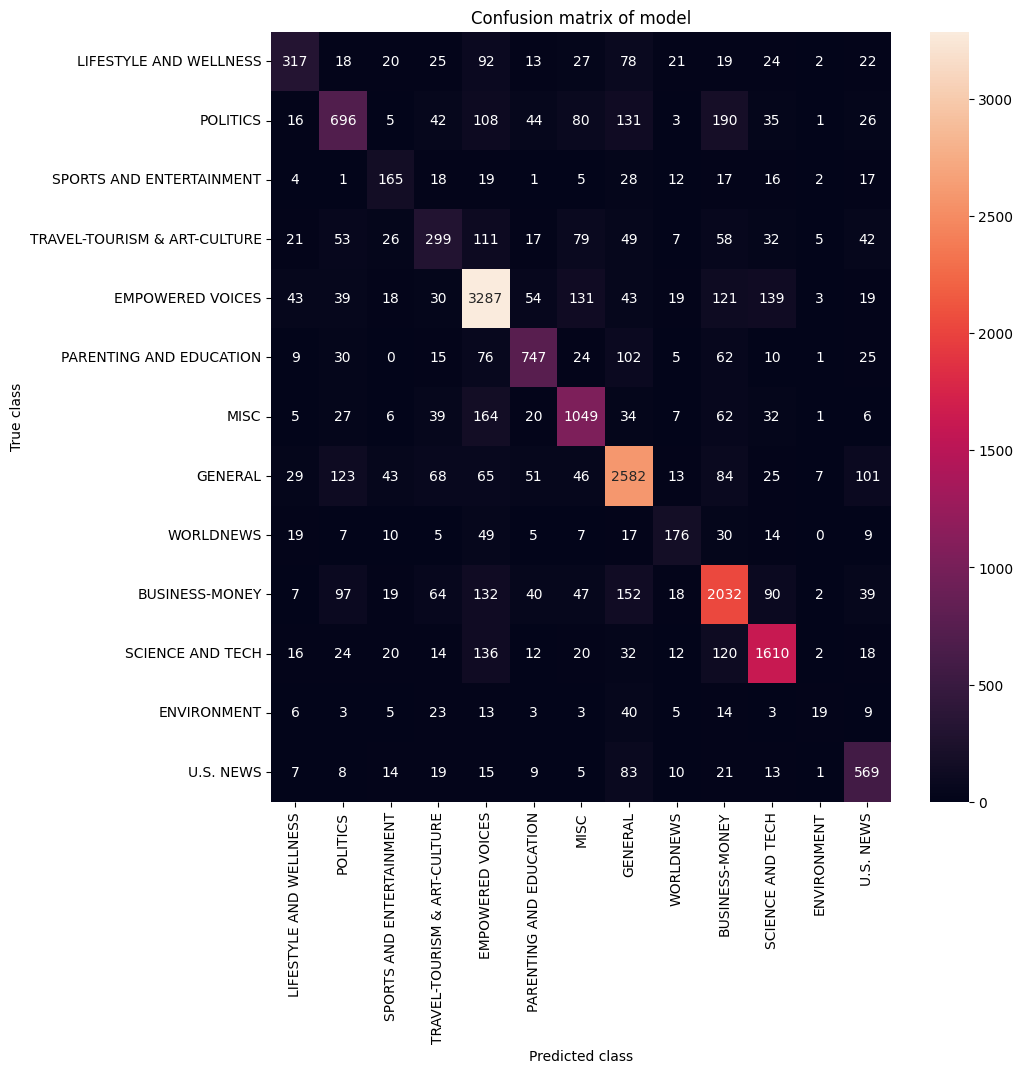

In [ ]:
print(classification_report(np.asarray(y_test),np.asarray( y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=classes,
                      yticklabels=classes,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

# 4- Model Predictions:

In [ ]:
classes = ['U.S. NEWS', 'SPORTS AND ENTERTAINMENT', 'PARENTING AND EDUCATION',
       'WORLDNEWS', 'TRAVEL-TOURISM & ART-CULTURE', 'SCIENCE AND TECH',
       'POLITICS', 'ENVIRONMENT', 'GENERAL', 'LIFESTYLE AND WELLNESS',
       'BUSINESS-MONEY', 'MISC', 'EMPOWERED VOICES']

In [ ]:
import tensorflow as tf


model_path = '/content/drive/MyDrive/topicDetection/model_lstm.h2'

# Load the model
loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
from pickle import load
tokenizer = load(open('/content/tokenizer.pickle', 'rb'))

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

max_length = 150
trunc_type='post'
padding_type='post'

inference_data = "Stay ahead in the realm of science and technology with articles on groundbreaking discoveries, innovations, and the future of cutting-edge research."
X = tokenizer.texts_to_sequences([inference_data])
X = pad_sequences(X,maxlen= max_length,padding=padding_type, truncating=trunc_type)
pred = loaded_model.predict(X)
pred_value = tf.argmax(pred,axis =1).numpy()
pred_class = classes[pred_value[0]]
print(pred_class)

1/1 [==============================] - 0s 34ms/step
POLITICS
